In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Mounting Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importing Datasets:
titanic = pd.read_csv('/content/drive/MyDrive/train.csv')

1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


In [ ]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Create a bar chart showing how many missing values are in each column



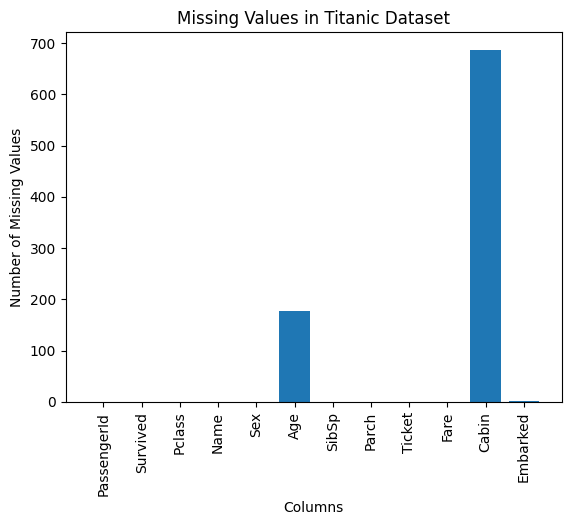

In [ ]:




# Calculate the number of missing values in each column
missing_values = titanic.isnull().sum()

# Create a bar chart of missing values
plt.bar(missing_values.index, missing_values.values)
plt.title('Missing Values in Titanic Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()


In [ ]:
missing_values = titanic.isnull().sum()
print(missing_values)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Which column has the most NaN values? How many cells in that column are empty?


In [ ]:
nan_count_columns = titanic.isna().sum()
nan_count_columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
max_nan_count = nan_count_columns.max()
print(max_nan_count)

687


#### The Cabin has the most NaN's with 687 empty cells.

### Delete all rows where Embarked is empty
### Fill all empty cabins with ¯\(ツ)/¯





In [ ]:
#Delete rows where 'Embarked' is empty
df = titanic.dropna(subset=['Embarked'], inplace=True)



In [13]:

# Create a new column
titanic['sex_encoded'] = titanic['Sex'].apply(lambda x: 1 if x == 'female' else 0)


In [ ]:
# Create dummy variables for the 'Embarked' column
dummy_cols = pd.get_dummies(titanic['Embarked'], prefix='Embarked', drop_first=True)

# Add the dummy columns to titanic DataFrame
titanic = pd.concat([titanic, dummy_cols], axis=1)


In [ ]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  Embarked_C  Embarked_Q  \
0      0         A/5 21171   7.2500  ¯\(ツ)/¯        S           0           0   
1      0          PC 17599  71.2833      C85        C           1           0   
2      0  STON/O2. 3101282   7.9250  ¯\(ツ)/¯        S           0           0   
3      0            113803  53.1000     C123        S           0           0   
4      0            373450   8.0500  ¯\(ツ)/¯        S           0           0   

   Embarked_S  family_count  sex_encoded  Embarked_Q  Embarked_S  
0           1             1            0           0           1  
1           0             1            1           0           0  
2           1             0            1           0           1  
3           1             1            1           0           1  
4           1             0            0           0           1

In [ ]:

# Create a new column 'family count'
titanic['family_count'] = titanic['SibSp'] + titanic['Parch']


In [ ]:
# replace NaN values in the cabin column with '¯\(ツ)/¯'
titanic['Cabin'].fillna('¯\(ツ)/¯', inplace=True)
titanic.head()

### Add 3 columns, Emarked_C, Embarked_Q and Embarked_S

In [ ]:
#Add 3 columns, Emarked_C, Embarked_Q and Embarked_S
titanic['Embarked_C'] = titanic['Embarked'].apply(lambda x: 1 if x == 'C' else 0)
titanic['Embarked_Q'] = titanic['Embarked'].apply(lambda x: 1 if x == 'Q' else 0)
titanic['Embarked_S'] = titanic['Embarked'].apply(lambda x: 1 if x == 'S' else 0)






In [ ]:
titanic.head() #verify dummy columns added.

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  Embarked_C  Embarked_Q  \
0      0         A/5 21171   7.2500  ¯\(ツ)/¯        S           0           0   
1      0          PC 17599  71.2833      C85        C           1           0   
2      0  STON/O2. 3101282   7.9250  ¯\(ツ)/¯        S           0           0   
3      0            113803  53.1000     C123        S           0           0   
4      0            373450   8.0500  ¯\(ツ)/¯        S           0           0   

   Embarked_S  family_count  sex_encoded  Embarked_Q  Embarked_S  
0           1             1            0           0           1  
1           0             1            1           0           0  
2           1             0            1           0           1  
3           1             1            1           0           1  
4           1             0            0           0           1

In [12]:


# Calculate the survival rate
survival_rate = titanic['Survived'].value_counts(normalize=True) * 100
print(survival_rate)


0    61.616162
1    38.383838
Name: Survived, dtype: float64


In [ ]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   889 non-null    int64  
 1   Survived      889 non-null    int64  
 2   Pclass        889 non-null    int64  
 3   Name          889 non-null    object 
 4   Sex           889 non-null    object 
 5   Age           712 non-null    float64
 6   SibSp         889 non-null    int64  
 7   Parch         889 non-null    int64  
 8   Ticket        889 non-null    object 
 9   Fare          889 non-null    float64
 10  Cabin         889 non-null    object 
 11  Embarked      889 non-null    object 
 12  Embarked_C    889 non-null    int64  
 13  Embarked_Q    889 non-null    int64  
 14  Embarked_S    889 non-null    int64  
 15  family_count  889 non-null    int64  
 16  sex_encoded   889 non-null    int64  
 17  Embarked_Q    889 non-null    uint8  
 18  Embarked_S    889 non-null    

In [14]:
# Calculate the survival rate by sex
survival_rates = titanic.groupby('sex_encoded')['Survived'].mean()
print('Survival rates by sex:\n', survival_rates)

# Print the column with the worst survival rate
# Worst survival rate is for males
worst_rate_column = survival_rates.idxmin()
print(f"\nThe column with the worst survival rate is '{worst_rate_column}' with a survival rate of {survival_rates[worst_rate_column]:.2%}")


Survival rates by sex:
 sex_encoded
0    0.188908
1    0.742038
Name: Survived, dtype: float64

The column with the worst survival rate is '0' with a survival rate of 18.89%


In [10]:
# Calculate the survival rate by Pclass
# Pclass 3 has worst survival rate
survival_rates = titanic.groupby('Pclass')['Survived'].mean()
print('Survival rates by Pclass:\n', survival_rates *100)


Survival rates by Pclass:
 Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [9]:
# Calculate the survival rate for cabins marked '¯\(ツ)/¯'
unknown_cabins = titanic[titanic['Cabin'] == '¯\(ツ)/¯']
survival_rate = unknown_cabins['Survived'].mean()
print(f"The survival rate for cabins marked '¯\(ツ)/¯' is {survival_rate:.2%}")


The survival rate for cabins marked '¯\(ツ)/¯' is nan%


In [8]:
# Calculate the survival rate for people whose Age is NaN
age_nan = titanic[titanic['Age'].isna()]
survival_rate = age_nan['Survived'].mean()
print(f"The survival rate for people whose Age is empty is {survival_rate:.2%}")


The survival rate for people whose Age is empty is 29.38%


In [7]:
# Calculate the survival rate by port of embarkation
survival_rates = titanic.groupby('Embarked')['Survived'].mean()
print('Survival rates by port of embarkation:\n', survival_rates * 100)


Survival rates by port of embarkation:
 Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


In [6]:
# Calculate the survival rate for children under 12 in each Pclass
children = titanic[titanic['Age'] < 12]
survival_rates = children.groupby('Pclass')['Survived'].mean()
print('Survival rates for children under 12 by Pclass:\n', survival_rates * 100)


Survival rates for children under 12 by Pclass:
 Pclass
1     75.000000
2    100.000000
3     40.425532
Name: Survived, dtype: float64


In [ ]:
# Create a new DataFrame containing only the people who died
died = titanic[titanic['Survived'] == 0]

# Find the row with the highest fare in the died DataFrame
max_fare_row = died.loc[died['Fare'].idxmax()]

# Print the passenger name, ticket fare, Pclass, Embarked
print("The person who died with the most expensive ticket was:")
print(max_fare_row['Name'])
print("Ticket fare:", max_fare_row['Fare'])
print("Class:", max_fare_row['Pclass'])
print("Embarked from:", max_fare_row['Embarked'])


The person who died with the most expensive ticket was:
Fortune, Mr. Charles Alexander
Ticket fare: 263.0
Class: 1
Embarked from: S


In [ ]:
# Create a new DataFrame containing only the relevant columns
family_df = titanic[['Survived', 'family_count']]

# Group by family count and calculate the mean survival rate
survival_rates = family_df.groupby('family_count')['Survived'].mean()

# Print survival rates for each family count
print('Survival rates by family count:\n', survival_rates)

# Calculate the overall survival rate
overall_survival_rate = family_df['Survived'].mean()

# Calculate the survival rate for people with family on the boat
with_family_survival_rate = family_df[family_df['family_count'] > 0]['Survived'].mean()

# Calculate the survival rate for people without family on the boat
without_family_survival_rate = family_df[family_df['family_count'] == 0]['Survived'].mean()

# Print the survival rates for people with and without family on the boat
print('Overall survival rate:', overall_survival_rate)
print('Survival rate with family:', with_family_survival_rate)
print('Survival rate without family:', without_family_survival_rate)


Survival rates by family count:
 family_count
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64
Overall survival rate: 0.38245219347581555
Survival rate with family: 0.5056497175141242
Survival rate without family: 0.30093457943925234


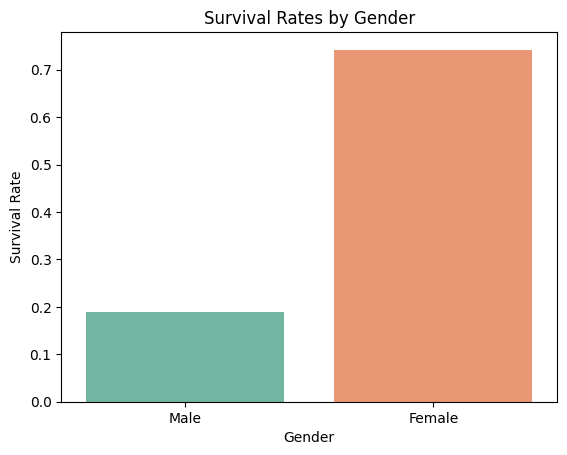

In [19]:
# Calculate survival rates by gender
gender_survival_rates = titanic.groupby('sex_encoded')['Survived'].mean().reset_index()

# Plot bar chart
sns.barplot(x='sex_encoded', y='Survived', data=gender_survival_rates, palette='Set2')
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()


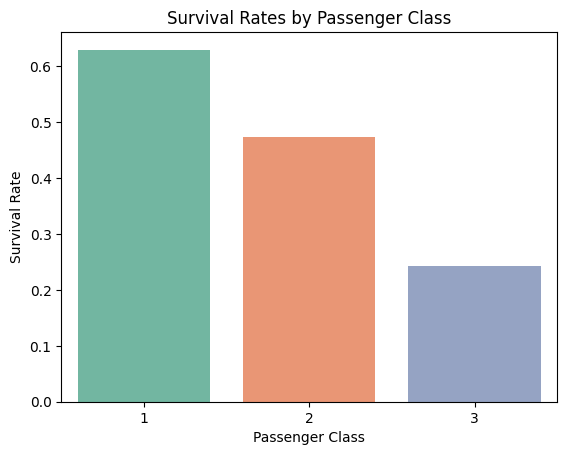

In [16]:
# Calculate survival rates by passenger class
pclass_survival_rates = titanic.groupby('Pclass')['Survived'].mean().reset_index()

# Plot bar chart
sns.barplot(x='Pclass', y='Survived', data=pclass_survival_rates, palette='Set2')
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


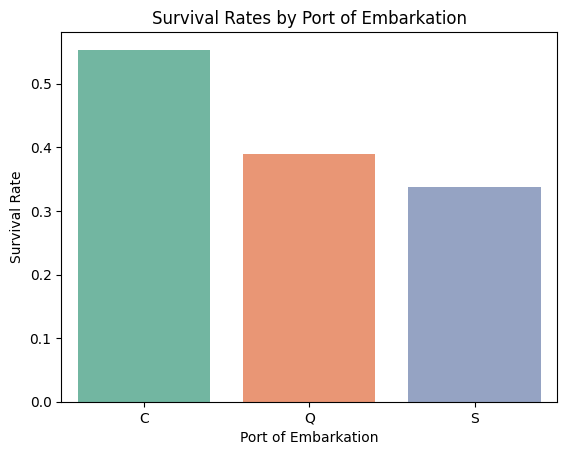

In [17]:
# Calculate survival rates by port of embarkation
embarked_survival_rates = titanic.groupby('Embarked')['Survived'].mean().reset_index()

# Plot bar chart
sns.barplot(x='Embarked', y='Survived', data=embarked_survival_rates, palette='Set2')
plt.title('Survival Rates by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()
